In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import math

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
data = load_breast_cancer()


In [3]:
df = pd.DataFrame(data = data.data,columns = data.feature_names)


In [4]:
df["Result"] = data.target

In [5]:
train, test = train_test_split(df, test_size=0.2)

In [6]:
train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Result
224,13.270,17.02,84.55,546.4,0.08445,0.04994,0.035540,0.024560,0.1496,0.05674,...,23.60,98.84,708.8,0.12760,0.13110,0.178600,0.09678,0.2506,0.07623,1
336,12.990,14.23,84.08,514.3,0.09462,0.09965,0.037380,0.020980,0.1652,0.07238,...,16.91,87.38,576.0,0.11420,0.19750,0.145000,0.05850,0.2432,0.10090,1
430,14.900,22.53,102.10,685.0,0.09947,0.22250,0.273300,0.097110,0.2041,0.06898,...,27.57,125.40,832.7,0.14190,0.70900,0.901900,0.24750,0.2866,0.11550,0
184,15.280,22.41,98.92,710.6,0.09057,0.10520,0.053750,0.032630,0.1727,0.06317,...,28.03,113.80,973.1,0.13010,0.32990,0.363000,0.12260,0.3175,0.09772,0
497,12.470,17.31,80.45,480.1,0.08928,0.07630,0.036090,0.023690,0.1526,0.06046,...,24.34,92.82,607.3,0.12760,0.25060,0.202800,0.10530,0.3035,0.07661,1
200,12.230,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.041070,0.1979,0.06013,...,28.36,92.15,638.4,0.14290,0.20420,0.137700,0.10800,0.2668,0.08174,1
318,9.042,18.90,60.07,244.5,0.09968,0.19720,0.197500,0.049080,0.2330,0.08743,...,23.40,68.62,297.1,0.12210,0.37480,0.460900,0.11450,0.3135,0.10550,1
202,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.352300,0.162000,0.2200,0.06229,...,32.68,177.00,1986.0,0.15360,0.41670,0.789200,0.27330,0.3198,0.08762,0
214,14.190,23.81,92.87,610.7,0.09463,0.13060,0.111500,0.064620,0.2235,0.06433,...,34.85,115.00,811.3,0.15590,0.40590,0.374400,0.17720,0.4724,0.10260,0
480,12.160,18.03,78.29,455.3,0.09087,0.07838,0.029160,0.015270,0.1464,0.06284,...,27.87,88.83,547.4,0.12080,0.22790,0.162000,0.05690,0.2406,0.07729,1


In [7]:
train_x = train["Result"]

In [8]:
from sklearn.svm import SVC
del train["Result"]
clf = SVC(gamma='auto')
clf.fit(train, train_x) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
res = test["Result"]
del test["Result"]
a = clf.predict(test)
len(a)

114

In [10]:
a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [11]:
accuracy_score(a,res)

0.6666666666666666

In [13]:
train_len = len(train)

data = pd.concat([train, test], axis=0)
data_labels = pd.concat([train_x, res], axis=0)

In [14]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [23]:
principalDf['label'] = data_labels

In [24]:
train, test = principalDf.iloc[:train_len, :], principalDf.iloc[train_len:, :]

In [25]:
test['pred'] = a

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
def genXY(h,data):
    """
    generate x and y grid values of height h
    """
    minx = min(data['principal component 1'])
    maxx = max(data['principal component 1']) + h
    numDivX = round((maxx - minx)/h)
    print(numDivX)
    x_l = []
    for i in range(1,numDivX+1):
        x_l.append((i*h) +minx)
    
    if(x_l[len(x_l)-1] != maxx):
        x_l.append(maxx)
        
        
    miny = min(data['principal component 2'])
    maxy = max(data['principal component 2']) + h
    numDivY = round((maxy - miny)/h)
    print(numDivY)
    y_l = []
    for i in range(1,numDivY+1):
        y_l.append((i*h) + miny)
    
    if(y_l[len(y_l)-1] != maxy):
        y_l.append(maxy)
    
    return x_l,y_l
        

In [27]:
#Grid size for test

max_1 = test.loc[test['principal component 1'].idxmax()]['principal component 1']

max_2 = test.loc[test['principal component 2'].idxmax()]['principal component 2']

min_1 = test.loc[test['principal component 1'].idxmin()]['principal component 1']

min_2 = test.loc[test['principal component 2'].idxmin()]['principal component 2']

x_axis = round((max_1 - min_1)/10)

y_axis = round((max_2-min_2)/10)

x_axis = x_axis.as_integer_ratio()[0]

y_axis = y_axis.as_integer_ratio()[0]

In [28]:
x_l = []
y_l = []
for i in range(0,11):
    x_l.append(round(min_1 + x_axis*i))

for i in range(0,11):
    y_l.append(round(min_2 + y_axis*i))


In [29]:
x_l_1, y_l_1 = genXY(100,test)

33
12


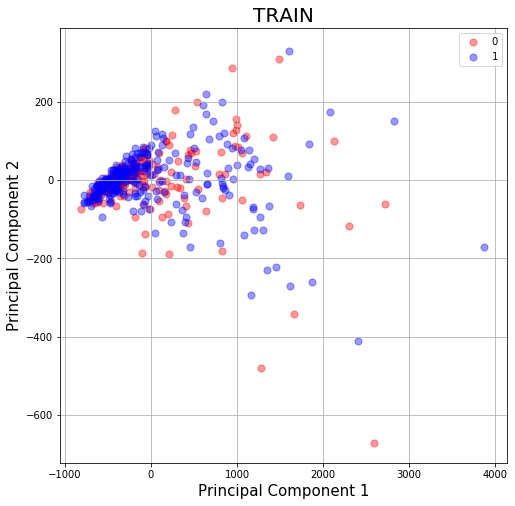

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TRAIN', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = train['label'] == target
    ax.scatter(train.loc[indicesToKeep, 'principal component 1']
               , train.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha = 0.4)
ax.legend(targets)
ax.grid()


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


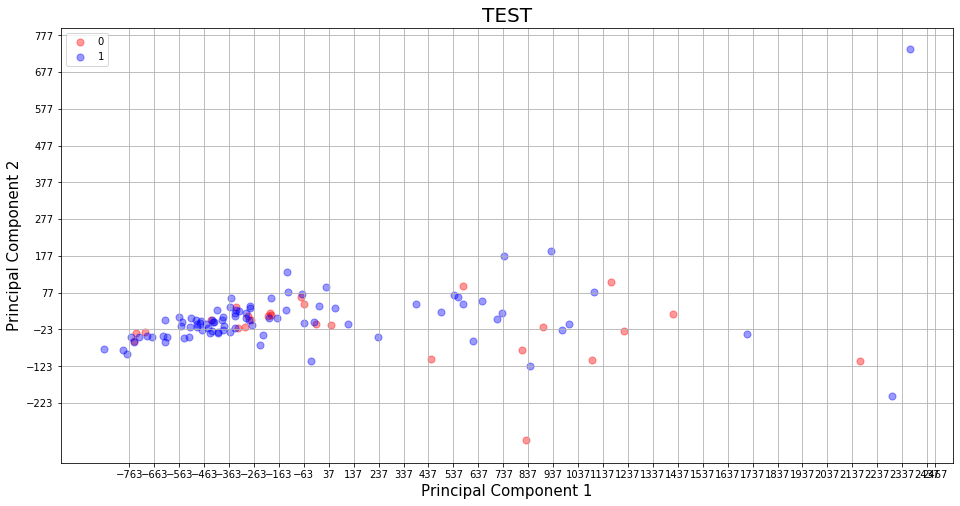

In [31]:
fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('TEST', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = test['label'] == target
    ax.scatter(test.loc[indicesToKeep, 'principal component 1']
               , test.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
              , alpha = 0.4)
ax.legend(targets)
ax.grid()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


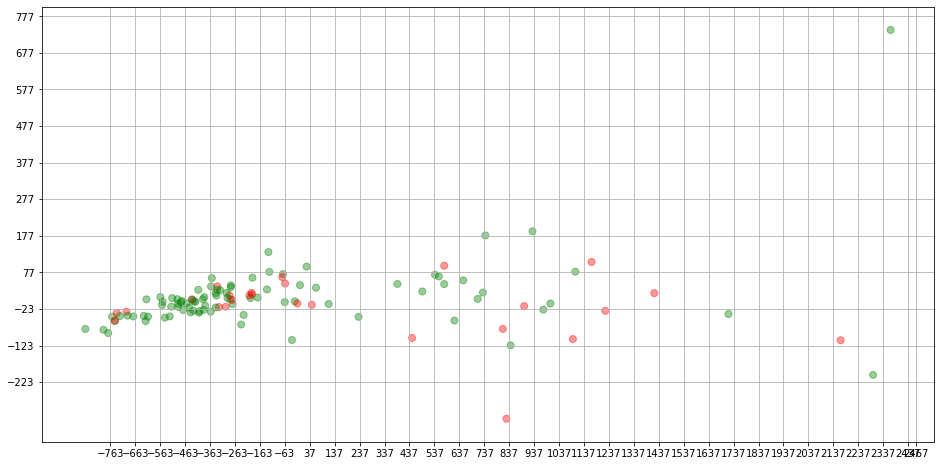

In [32]:
test["color"] = test["label"] == test["pred"]
c = []
for i in test["color"]:
    if i:
        c.append('g')
    else:
        c.append('r')

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50
              , alpha = 0.4)

ax.grid()

In [33]:
def inWindows(x1,x2,y1,y2,x,y):
    if (x >= x1 and x < x2) and (y>=y1 and y<y2):
        return True
    return False

In [34]:
def genDensityMetric(data,x_l,y_l):
    """
     get count of data points in a grid line and accuracy percentage
    """
    densityMap = []
    count = len(data)
    for x in range(len(x_l)-1):
        for y in range(len(y_l)-1):
            results = []
            preds = []
            density = 0
            for i in data.values:
                if(inWindows(x_l[x],x_l[x+1],y_l[y],y_l[y+1],i[0],i[1])):
                    results.append(i[3])
                    preds.append(i[2])
                    density = density + 1
            if density != 0:
                f1 = f1_score(results,preds)
                acc = accuracy_score(results,preds)
                rec = recall_score(results,preds)
                prec = precision_score(results,preds)
                densityMap.append([x_l[x+1],y_l[y+1],density,density/count,acc,f1,rec,prec])
    dm = pd.DataFrame(data = densityMap, columns=['x','y','num pts','density','accuracy score','f1 score','recall score','precision score'])
    return dm
            

In [35]:
densityMap = genDensityMetric(test,x_l_1,y_l_1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
densityMap.sort_values(by=['x'],ascending=True)

,x,y,num pts,density,accuracy score,f1 score,recall score,precision score
0,-663.142308,-22.901516,8,0.070175,0.625000,0.769231,0.625000,1.0
1,-563.142308,-22.901516,3,0.026316,1.000000,1.000000,1.000000,1.0
2,-563.142308,77.098484,1,0.008772,1.000000,1.000000,1.000000,1.0
3,-463.142308,-22.901516,3,0.026316,1.000000,1.000000,1.000000,1.0
4,-463.142308,77.098484,10,0.087719,1.000000,1.000000,1.000000,1.0
5,-363.142308,-22.901516,5,0.043860,1.000000,1.000000,1.000000,1.0
6,-363.142308,77.098484,10,0.087719,0.900000,0.947368,0.900000,1.0
7,-263.142308,-22.901516,1,0.008772,1.000000,1.000000,1.000000,1.0
8,-263.142308,77.098484,18,0.157895,0.722222,0.838710,0.722222,1.0
10,-163.142308,77.098484,6,0.052632,0.500000,0.666667,0.500000,1.0
